# TASK 1: DIABETES
### Build a network which is able to diagnose diabetes, given some pacients' entries.

We're gonna need pandas to import the archives, from the following link: https://clearnightsrthebest.com/teaching-ensino/ - we're gonna use wget to make the download.
This code was build with great help from the site: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7159f449d588dccfa00c47cddad8d6265800ce2e83aa20b4aab50df637ce1da4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


NOW, WE'RE GONNA IMPORT THE DATASET AND MAKE THE DOWNLOAD AND EXTRACTION IF NEEDED!

In [2]:
import wget
import zipfile
from zipfile import ZipFile
import os

if os.path.exists('./dados_dia.zip'):
    print(' ** Dataset already downloaded!')
    if os.path.exists('Pima-Diabetes.csv'):
        print(' ** Dataset already extracted! You may proceed.')
    else:
        print(' ** Extracting files...')
        with zipfile.ZipFile("dados_dia.zip", 'r') as zip_ref:
            zip_ref.extractall()
        print(' ** Done! Your dataset is ready to rock.')
else:
    print(' ** Downloading files...')
    wget.download('https://clearskiesrbest.files.wordpress.com/2020/09/dados_dia.zip')
    print(" ** Download successful. Extracting files...")
    with zipfile.ZipFile("dados_dia.zip", 'r') as zip_ref:
        zip_ref.extractall() 
    print(' ** Done! Your dataset is ready to rock.')

 ** Downloading files...
 ** Download successful. Extracting files...
 ** Done! Your dataset is ready to rock.


NEXT STEP: Import data from the downloaded archives into Python code.

In [3]:
import pandas as pd
import numpy as np

train_diab = pd.read_csv('Pima-Diabetes.csv', header=None)
test_diab = pd.read_csv('Test-Group-2.csv', header=None)
print(' ** Training set shape is:', train_diab.shape)
print(' ** Test set is:', test_diab.shape)

#print(train_diab.describe())
print(train_diab)
print('\n ** Checking data you may realize that there are some missing data.')
print(' ** Replacing missing data with median values for that column...')

columns = [1, 2, 3, 4, 5, 6]
print(' ** Columns with missing data: ', columns)
medians = dict()
for i in columns:
    medians[i] = train_diab.iloc[:,i].median()
    train_diab.iloc[:,i] = train_diab.iloc[:,i].replace(to_replace=0,
                                                        value=medians[i])
    test_diab.iloc[:,i] = test_diab.iloc[:,i].replace(to_replace=0,
                                                        value=medians[i])

print(' ** Check if it worked below.')
print(train_diab)

print(' ** Converting pandas dataframe to np.arrays of x_data (inputs) \
and y_data (labels).')
x_data = train_diab.iloc[:,:8].values
y_data = train_diab.iloc[:,8:9].values
x_test = test_diab.iloc[:,:8].values

###y_test is missing on dataset so we're importing it right from here.
y_test = (0, 1, 0, 1, 0, 0, 0, 0, 1, 0)

print(' ** x_data: %s, y_data: %s, x_test: %s, y_test: %s. \
' % (x_data.shape, y_data.shape, x_test.shape, len(y_test)))

print(' ** Normalizing data...')
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x_data = SS.fit_transform(x_data)
x_test = SS.transform(x_test)    #TIRAMOS O FIT PARA USAR O MESMO SCALER PARA AMBOS OS SETS!
#O PROCESSO DE NORMALIZAÇÃO SIGNIFICA EXATAMENTE ISSO: DEIXAR OS DADOS
#MAIS OU MENOS NAS MESMAS ESCALAS, DE MODO A FACILITAR A SUA COMPUTAÇÃO

#print(x_data)

print(' ** Encoding classes to binary values...')
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
y_data = OHE.fit_transform(y_data).toarray()

print(' ** Done!')

 ** Training set shape is: (758, 9)
 ** Test set is: (10, 8)
     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
..  ..  ...  ..  ..  ...   ...    ...  .. ..
753  0  181  88  44  510  43.3  0.222  26  1
754  8  154  78  32    0  32.4  0.443  45  1
755  1  128  88  39  110  36.5  1.057  37  1
756  7  137  90  41    0  32.0  0.391  39  0
757  0  123  72   0    0  36.3  0.258  52  1

[758 rows x 9 columns]

 ** Checking data you may realize that there are some missing data.
 ** Replacing missing data with median values for that column...
 ** Columns with missing data:  [1, 2, 3, 4, 5, 6]
 ** Check if it worked below.
     0    1   2   3    4     5      6   7  8
0    6  148  72  35   36  33.6  0.627  50  1
1    1   85  66  29   36  26.6  0.351  31  0
2    8  183  64  23   36 

NEXT: NOW IT'S TIME TO BUILD THE MODEL!

In [4]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
from keras.utils import to_categorical

######MODEL PARAMETERS
num_epochs = 50
batch_sz = 16
train_val_split = 0.2

######BUILDING MODEL
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

############COMPILING MODEL.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

##############TRAINING MODEL
history = model.fit(
  x_data, 
  y_data, 
  epochs = num_epochs,
  shuffle = True,
  validation_split = train_val_split,
  batch_size = batch_sz,
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6

VAMOS PÔR ISSO EM GRÁFICO???

1/1 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 1.0000

 ** Loss = 0.19710609316825867; Acc = 1.0.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0 1 0 1 0 0 0 0 1 0]
(0, 1, 0, 1, 0, 0, 0, 0, 1, 0)


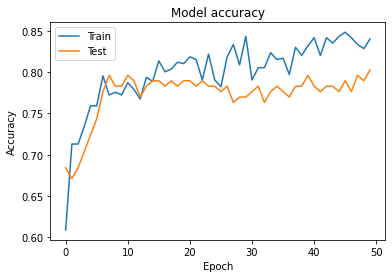

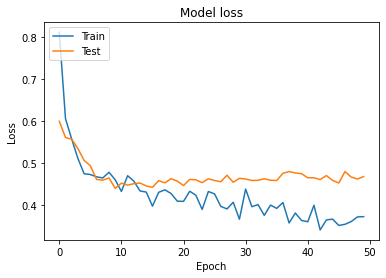

In [5]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(x_test, to_categorical(y_test))
print('\n ** Loss = %s; Acc = %s.' % (loss,acc))

preds = model.predict_classes(
  x_test
)
print(preds)
print(y_test)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

F1 EVALUATION


 ** F1_Score: 1.0, F0.01_Score: 1.0

 ** AUC (via metrics.auc): 1.0


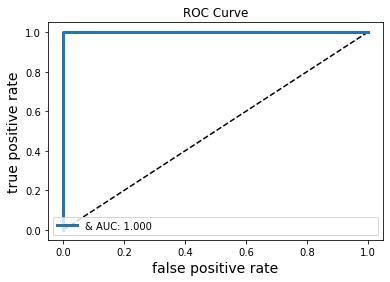

In [6]:
import sklearn
from sklearn import metrics

def FScoreCalc(y_test, x_test, model):

    probsp = np.argmax(model.predict(x_test), axis=-1)

    f_1_score = sklearn.metrics.f1_score(y_test, probsp)
    f_001_score = sklearn.metrics.fbeta_score(y_test, probsp, beta=0.01)
    
    print('\n ** F1_Score: %s, F0.01_Score: %s' % (f_1_score, f_001_score))
    return [f_1_score, f_001_score]

def ROCCurveCalculate(y_test, x_test, model):

    probs = model.predict(x_test)
    probsp = probs[:, 1]
    y_new = y_test
    thres = 1000

    threshold_v = np.linspace(1, 0, thres)
    tpr, fpr = ([] for i in range(2))
    
    for tt in range(0, len(threshold_v), 1):
        thresh = threshold_v[tt]
        TPscore, FPscore, TNscore, FNscore = (0 for i in range(4))
        for xz in range(0, len(probsp), 1):
            if probsp[xz] > thresh:
                if y_new[xz] == 1:                
                    TPscore = TPscore + 1
                else:
                    FPscore = FPscore + 1
            else:
                if y_new[xz] == 0:
                    TNscore = TNscore + 1
                else:
                    FNscore = FNscore + 1
        TPRate = TPscore / (TPscore + FNscore)
        FPRate = FPscore / (FPscore + TNscore)
        tpr.append(TPRate)
        fpr.append(FPRate)           

    auc = metrics.auc(fpr, tpr)
    print('\n ** AUC (via metrics.auc): %s' % (auc))
    return [tpr, fpr, auc]

f_1_score, f_001_score = FScoreCalc(y_test, x_test, model)
tpr, fpr, auc = ROCCurveCalculate(y_test, x_test, model)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--') # k = color black
plt.plot(fpr, tpr, label="& AUC: %.3f" % auc, linewidth=3) 
plt.legend(loc='lower right', ncol=1, mode="expand")
plt.title('ROC Curve')
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)
plt.show()

WHAT ABOUT IF WE CALCULATE THE ROC FOR THOSE TRAINING SAMPLES?


 ** AUC (via metrics.auc): 0.9407707910750506


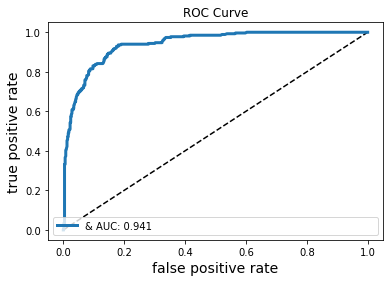

In [7]:
y_data = y_data[:,1]
tpr, fpr, auc = ROCCurveCalculate(y_data, x_data, model)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--') # k = color black
plt.plot(fpr, tpr, label="& AUC: %.3f" % auc, linewidth=3) 
plt.legend(loc='lower right', ncol=1, mode="expand")
plt.title('ROC Curve')
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)
plt.show()